 ### install and import dependencies


In [71]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [73]:
pip install mediapipe --user


Note: you may need to restart the kernel to use updated packages.


In [74]:
import cv2
import numpy as np
import os
import time
from matplotlib import pyplot as plt
import mediapipe as mp

#  keypoints using mp holistics

In [75]:
mp_holistic= mp.solutions.holistic #make our detections
mp_drawing = mp.solutions.drawing_utils #make drawings

In [76]:
def mediapipe_detection(image,model):
    #mediapipe uses image in RGB only.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)#color conversion
    image.flags.writeable= False #image is no longer writeable
    results=model.process(image)# make prediction using mediapipe
    image.flags.writeable= True #image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)#color conversion to rdb to
    return image, results 

In [77]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [282]:
cap = cv2.VideoCapture(1) # note: use videoCapture(1) if using webcam
#set mediapipe models
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #read our feed: reading the frame from our webcam
        ret, frame = cap.read()# frame img from webcam

        #make detections
        image,results = mediapipe_detection(frame, holistic)
        print(results)
        
        #draw landmarks
        draw_styled_landmarks(image,results)

        #show to screen
        cv2.imshow('OpenCV feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [284]:
draw_styled_landmarks(image,results)

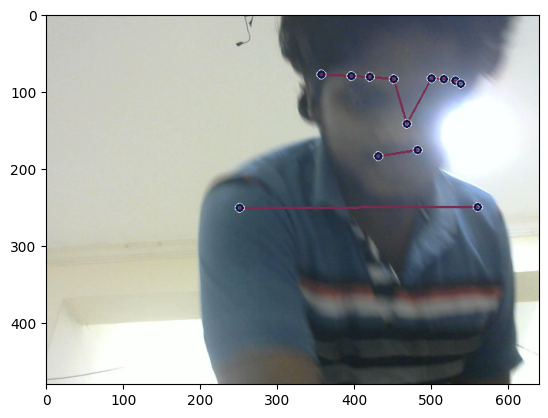

In [287]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

# extract key points

In [288]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [289]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])


In [85]:
x=extract_keypoints(results)

In [86]:
x

array([ 0.54666036,  0.62760544, -1.05235374, ...,  0.        ,
        0.        ,  0.        ])

# setup folder

In [290]:
DATA_PATH=os.path.join("C:/Users/charan/OneDrive/Desktop/signLanguageDetection/MP_DATA")
#action detection
actions =  ['I love you','Hello','Thanks','want']
#we use 30 videos of data
no_consequences=60
#we use 30 frames to detect the action
sequence_lenght=60 

In [291]:


for action in actions:
    for sequence in range(no_consequences):
        path_to_create = os.path.join(DATA_PATH, str(action), str(sequence))
        os.makedirs(path_to_create)

        


# collect key points for training and testing

In [292]:
cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_consequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_lenght):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# preprocessing data, creating labels and features

In [100]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [101]:
label_map={label:num for num,label in enumerate(actions)}

In [102]:
label_map

{'I love you': 0, 'Hello': 1, 'Thanks': 2}

In [103]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_lenght):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
        

In [104]:
x= np.array(sequences)

In [105]:
res.shape

(1662,)

In [106]:
np.sum(res[0])

0.5444055199623108

In [107]:
y=to_categorical(labels).astype(int) #convet to one hot encoding

In [108]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [109]:
x_train, x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.05)

In [110]:
x_train, x_test ,y_train ,y_test

(array([[[ 0.5382117 ,  0.46111852, -1.35429394, ...,  0.54357833,
           0.72778726, -0.05017185],
         [ 0.54108316,  0.46112195, -1.2621119 , ...,  0.51497012,
           0.6172725 , -0.05826622],
         [ 0.54448187,  0.46097353, -1.34607339, ...,  0.51360971,
           0.61738521, -0.05505662],
         ...,
         [ 0.54824269,  0.46616983, -1.11316097, ...,  0.52109903,
           0.67098063, -0.09640012],
         [ 0.54765403,  0.45837662, -1.16056275, ...,  0.52810508,
           0.70620197, -0.08901132],
         [ 0.5470559 ,  0.45773029, -1.01367903, ...,  0.53539622,
           0.75175166, -0.10766707]],
 
        [[ 0.61618179,  0.48807153, -1.24689841, ...,  0.24166772,
           0.37770006, -0.06326187],
         [ 0.61646885,  0.48813766, -1.14646339, ...,  0.2405998 ,
           0.37935102, -0.06646293],
         [ 0.61613119,  0.48797226, -1.18505919, ...,  0.23863709,
           0.37893796, -0.06438983],
         ...,
         [ 0.56595278,  0.4141308

# training using LSTM

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [140]:
log_dir = os.path.join("C:/Users/charan/OneDrive/Desktop/signLanguageDetection/logs")
tb_callback = TensorBoard(log_dir=log_dir)

In [142]:
actions_array=np.array(actions)

In [143]:
actions_array.shape[0]

3

In [144]:
x_train.shape

(85, 30, 1662)

In [210]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))  # Set return_sequences to False
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions_array.shape[0], activation='softmax'))

In [211]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [212]:
model.fit(x_train, y_train, epochs=300, callbacks=[tb_callback])

Epoch 1/300
3/3 [==============================] - 4s 140ms/step - loss: 1.1611 - categorical_accuracy: 0.3294
Epoch 2/300
3/3 [==============================] - 0s 139ms/step - loss: 1.8991 - categorical_accuracy: 0.2000
Epoch 3/300
3/3 [==============================] - 1s 181ms/step - loss: 1.2941 - categorical_accuracy: 0.4588
Epoch 4/300
3/3 [==============================] - 0s 139ms/step - loss: 1.3413 - categorical_accuracy: 0.3529
Epoch 5/300
3/3 [==============================] - 0s 130ms/step - loss: 1.0884 - categorical_accuracy: 0.3412
Epoch 6/300
3/3 [==============================] - 0s 133ms/step - loss: 1.3926 - categorical_accuracy: 0.2588
Epoch 7/300
3/3 [==============================] - 0s 132ms/step - loss: 1.1030 - categorical_accuracy: 0.3765
Epoch 8/300
3/3 [==============================] - 0s 130ms/step - loss: 1.0374 - categorical_accuracy: 0.4941
Epoch 9/300
3/3 [==============================] - 0s 129ms/step - loss: 0.9565 - categorical_accuracy: 0.5412
E

KeyboardInterrupt: 

# make predictions

In [235]:
res = model.predict(x_test)


1/1 [==============================] - 0s 57ms/step


In [236]:
res

array([[2.21225385e-08, 1.00000000e+00, 5.17962368e-17],
       [4.74627689e-03, 9.95250106e-01, 3.51832296e-06],
       [9.77576911e-01, 2.24231053e-02, 1.49455524e-08],
       [5.30723425e-12, 4.28574378e-14, 1.00000000e+00],
       [9.80895340e-01, 1.91046223e-02, 1.40416985e-08]], dtype=float32)

In [237]:
np.sum(res[0])

1.0

In [238]:
actions[np.argmax(res[1])]

'Hello'

In [239]:
actions[np.argmax(y_test[1])]

'Hello'

In [240]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_28 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_29 (LSTM)              (None, 64)                49408     
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

In [241]:
model.save('action.h5')

In [242]:
model.load_weights('action.h5')

In [222]:
print(model)

In [223]:
model

# Evaluation using Confusion Matrix and Accuracy

In [251]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [252]:
yhat = model.predict(x_test)

1/1 [==============================] - 0s 100ms/step


In [253]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()


In [254]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[3, 0],
        [0, 2]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [258]:
res = res.flatten()

In [260]:
res

array([9.9032146e-01, 9.6785491e-03, 9.5375325e-09], dtype=float32)

In [261]:
accuracy_score(ytrue, yhat)

1.0

# testing real life 

In [262]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

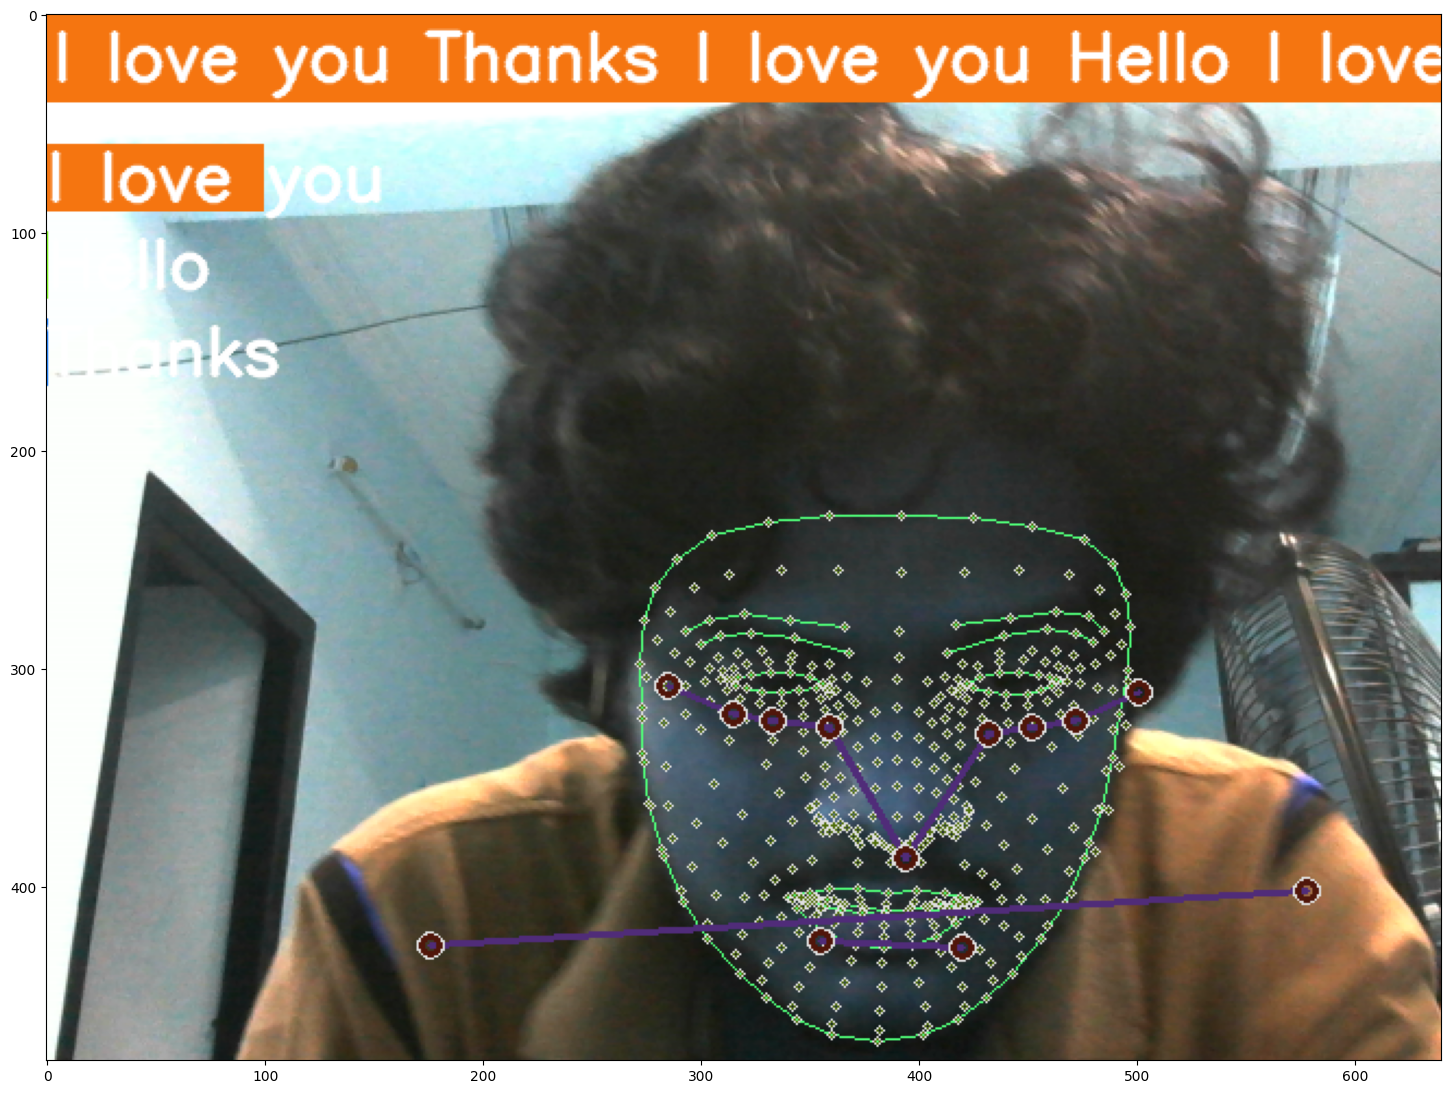

In [263]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [264]:
sequence.reverse()

In [265]:
len(sequence)

30

In [266]:
sequence.append('def')

In [267]:
sequence.reverse()

In [268]:
sequence[-30:]

[array([ 0.61617076,  0.80701828, -3.11923456, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.61636943,  0.81061393, -3.19408989, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.61724776,  0.81666219, -3.40196753, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.61010206,  0.81110352, -3.25340772, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.6071279 ,  0.80717832, -3.05083704, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.60341465,  0.7994352 , -3.27395391, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.60258734,  0.80264515, -2.89464188, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.60170567,  0.79213983, -2.63207054, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.60182697,  0.77822429, -2.85758543, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.59863377,  0.78428155, -3.12155271, ...,  0.        ,
         0.        ,  0.  

In [279]:
sequence=[]
sentence=[]
threshold=0.8
cap = cv2.VideoCapture(1) # note: use videoCapture(1) if using webcam
#set mediapipe models
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #read our feed: reading the frame from our webcam
        ret, frame = cap.read()# frame img from webcam

        #make detections
        image,results = mediapipe_detection(frame, holistic)
        print(results)
        
        #draw landmarks
        draw_styled_landmarks(image,results)
        
        #prediction logic 
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence=sequence[:30]
        
        if len(sequence)==30:
            res=model.predict(np.expand_dims(sequence,axis=0))[0]
            print(actions[np.argmax(res)])
            
        #Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        #show to screen
        cv2.imshow('OpenCV feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [269]:
res[np.argmax(res)] > threshold

True

In [275]:
model.predict(np.expand_dims(x_test[0], axis=0))

1/1 [==============================] - 0s 40ms/step


array([[2.2122665e-08, 1.0000000e+00, 5.1796237e-17]], dtype=float32)